<a href="https://colab.research.google.com/github/stevemorrisbi/TopTransfers/blob/main/Top_Transfers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Analysis of the 'Top 50 biggest transfers' in Football History. This exploration looks at:
- The highest player purchase for each year recorded in the top 50 transfers.
- The top 5 teams who have spent the most out of all the top 50 tranfers.
- The top 5 teams with the most sales in all of the top 50 tranfers.

In [1]:

import pandas as pd

# scraping web data via the url below

scraper = pd.read_html("https://en.wikipedia.org/wiki/List_of_most_expensive_association_football_transfers")


# below prints out all tables from the parsed url, assigning and index and seperating with ---- for formatting

# for i, table in enumerate(scraper):
#   print ("------------")
#   print(i)
#   print(table)

# for loop commented out above after seeing which table to retrieve

# printing first table (index 0)
scraper[0]

In [2]:
columns_to_remove = ['Ref.', 'Fee (€ million)']  # List of column names to remove

# assigning dataframe with dropped columns to a new variable
df = scraper[0].drop(columns_to_remove, axis=1)

df

,Rank,Player,From,To,Position,Fee (£ million),Year
0,1,Neymar,Barcelona,Paris Saint-Germain,Forward,£198,2017
1,2,Kylian Mbappé,Monaco,Paris Saint-Germain,Forward,£163,2018[b]
2,3,Philippe Coutinho,Liverpool,Barcelona,Midfielder,£105[c],2018
3,4,João Félix,Benfica,Atlético Madrid,Forward,£112.9,2019
4,5,Enzo Fernández,Benfica,Chelsea,Midfielder,£106.8,2023
5,6,Antoine Griezmann,Atlético Madrid,Barcelona,Forward,£107,2019
6,7,Jack Grealish,Aston Villa,Manchester City,Midfielder,£100,2021
7,8,Declan Rice,West Ham United,Arsenal,Midfielder,£100[d],2023
8,9,Moisés Caicedo,Brighton & Hove Albion,Chelsea,Midfielder,£100[e],2023
9,10,Romelu Lukaku,Inter Milan,Chelsea,Forward,£97.5,2021


In [3]:
columns_to_clean = ['Fee (£ million)', 'Year']  # List of columns to clean

# Create a new DataFrame with cleaned columns
cleaned_df = df.copy()  # Make a copy of the original DataFrame to avoid modifying it

# iterating over the two selected columns to remove any none numeric characters from
for column in columns_to_clean:
    cleaned_df[column] = cleaned_df[column].str.replace(r'\[.*?\]', '', regex=True)

# Print the cleaned DataFrame
print(cleaned_df)

# saving as a csv in case needed to develop outside of Python/Collab
cleaned_df.to_csv('highest transfers.csv', index = False)

    Rank               Player                    From                   To  \
0      1               Neymar               Barcelona  Paris Saint-Germain   
1      2        Kylian Mbappé                  Monaco  Paris Saint-Germain   
2      3    Philippe Coutinho               Liverpool            Barcelona   
3      4           João Félix                 Benfica      Atlético Madrid   
4      5       Enzo Fernández                 Benfica              Chelsea   
5      6    Antoine Griezmann         Atlético Madrid            Barcelona   
6      7        Jack Grealish             Aston Villa      Manchester City   
7      8          Declan Rice         West Ham United              Arsenal   
8      9       Moisés Caicedo  Brighton & Hove Albion              Chelsea   
9     10        Romelu Lukaku             Inter Milan              Chelsea   
10    11      Ousmane Dembélé       Borussia Dortmund            Barcelona   
11    11           Paul Pogba                Juventus    Manches

In [4]:
# Creating a CSV download for the above table

# from google.colab import files

# # Download the file
# files.download('highest transfers.csv')


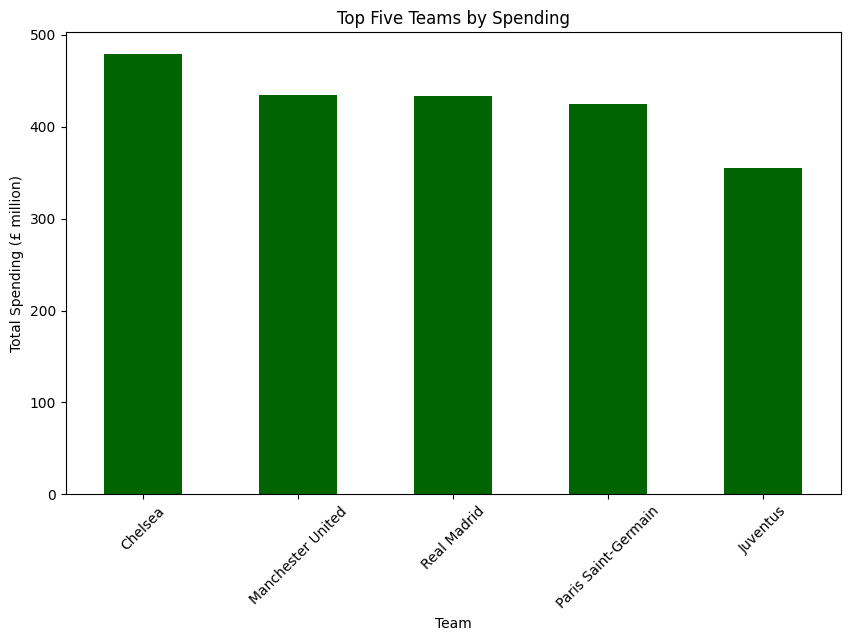

In [5]:
# importing this library to visualise data
import matplotlib.pyplot as plt

# Remove '£' sign and convert the column to numeric to perform
# The errors='coerce' parameter is used to handle any invalid values by converting them to NaN (Not a Number).
df['Fee (£ million)'] = pd.to_numeric(df['Fee (£ million)'].str.replace('£', ''), errors='coerce')

# Group by 'Team' and sum the 'Fee (£ million)' column
team_spending = df.groupby('To')['Fee (£ million)'].sum()

# Sort the teams by spending in descending order and select the top five
top_five_teams = team_spending.sort_values(ascending=False).head(5)

# Create a bar chart to visualize the spending of the top five teams
plt.figure(figsize=(10, 6))
top_five_teams.plot(kind='bar', color='darkgreen')
plt.title('Top Five Teams by Spending')
plt.xlabel('Team')
plt.ylabel('Total Spending (£ million)')
plt.xticks(rotation=45)
plt.show()

In [6]:
# Top signings for distinctive years out of the top 50 highest ever transfers

# Remove non-numeric characters from the "Year" column
df['Year'] = df['Year'].str.replace(r'[^0-9]', '', regex=True)

# Convert the "Year" column to a datetime data type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Finding the index for the maximum Fee for each year
idx = df.groupby('Year')['Fee (£ million)'].idxmax()

# Using the idxmax previous step to select specific row and extract the needed columns
result = cleaned_df.loc[idx, ['Year', 'Player','Fee (£ million)', 'To']].sort_values(by='Year')

# Rename the columns 'To' to 'Club' for clarity
result.columns = ['Year', 'Player','Maximum Spend (£ million)', 'Club']

# Printing final output
print(result)

    Year             Player Maximum Spend (£ million)                 Club
35  2001    Zinedine Zidane                     £46.6          Real Madrid
18  2009  Cristiano Ronaldo                       £80          Real Madrid
16  2013        Gareth Bale                       £86          Real Madrid
27  2014        Luis Suárez                       £65            Barcelona
43  2015    Kevin De Bruyne                       £55      Manchester City
11  2016         Paul Pogba                       £89    Manchester United
0   2017             Neymar                      £198  Paris Saint-Germain
1   2018      Kylian Mbappé                      £163  Paris Saint-Germain
3   2019         João Félix                    £112.9      Atlético Madrid
26  2020        Kai Havertz                       £71              Chelsea
6   2021      Jack Grealish                      £100      Manchester City
17  2022             Antony                       £82    Manchester United
4   2023     Enzo Fernánd

In [9]:
# Teams who recieved the most money for players from the Top 50 all time sales - by each year

# Extract the year from the 'Year' column
df['Year'] = df['Year'].dt.year

# Group by 'Year' and 'Club' and sum the 'Fee (£ million)' column
yearly_team_spending = df.groupby(['Year', 'From'])['Fee (£ million)'].sum().reset_index()

# Find the club with the maximum total spending for each year
club_with_max_spending = yearly_team_spending.groupby('Year')['Fee (£ million)'].idxmax()

# Extract the corresponding year, maximum spend, and club
result = yearly_team_spending.loc[club_with_max_spending].sort_values(by='Year')

# Rename the columns for clarity
result.columns = ['Year', 'Club', 'Total Spending (£ million)']

# Print the result
print(result)

    Year               Club  Total Spending (£ million)
0   2001           Juventus                        46.6
1   2009  Manchester United                        80.0
2   2013  Tottenham Hotspur                        86.0
3   2014          Liverpool                        65.0
6   2015      VfL Wolfsburg                        55.0
7   2016           Juventus                        89.0
9   2017          Barcelona                       198.0
14  2018             Monaco                       226.0
19  2019    Atlético Madrid                       238.0
26  2020   Bayer Leverkusen                        71.0
28  2021        Aston Villa                       100.0
31  2022               Ajax                        82.0
46  2023         RB Leipzig                       137.0


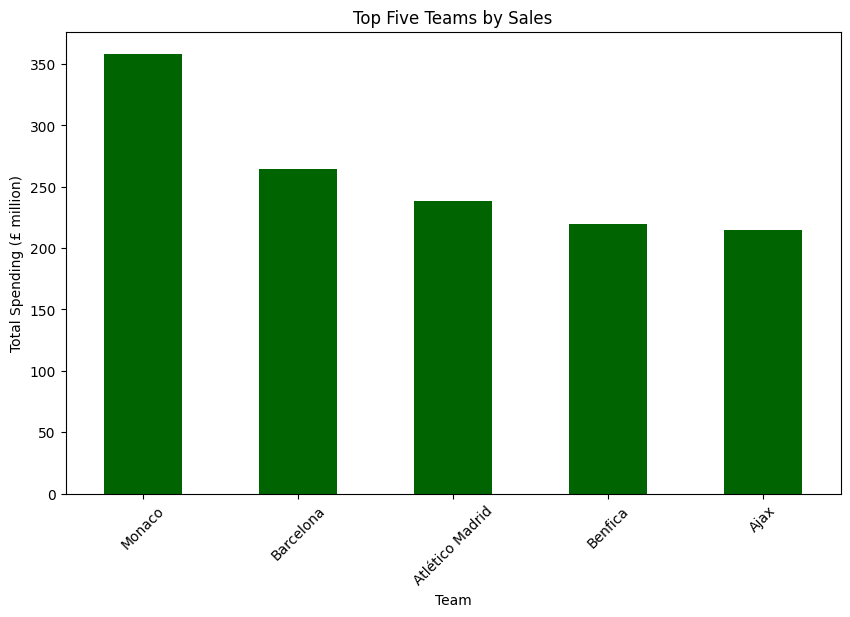

In [10]:
# Top five teams by sales

# Group by 'Team' and sum the 'Fee (£ million)' column
team_sales = df.groupby('From')['Fee (£ million)'].sum()

# Sort the teams by spending in descending order and select the top five
top_five_sales_teams = team_sales.sort_values(ascending=False).head(5)

# Create a bar chart to visualize the spending of the top five teams
plt.figure(figsize=(10, 6))
top_five_sales_teams.plot(kind='bar', color='darkgreen')
plt.title('Top Five Teams by Sales')
plt.xlabel('Team')
plt.ylabel('Total Spending (£ million)')
plt.xticks(rotation=45)
plt.show()